In [281]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, cKDTree

In [282]:
#constants
G = 6.674e-11 
Mpc = 3.086e22
c = 3.0e8

In [283]:
def einsteinrad(Dlens, Dsource, Mass):
    '''Takes in distance from the lens to the souce and the observer and the mass of the lens. Returns the Einstein radius
    '''
    D = Dsource-Dlens
    Theta = ((D/(Dsource*Dlens))*(4.0*G*Mass/(c**2)))**(0.5)
    return Theta

In [284]:
def beta(Dlens, Dsource, Mass, theta):
    '''Lens equation. Takes in distance from the lens to the souce and the observer and the mass of the lens, mass of the lens,
    and angle theta
    '''
    D = Dsource - Dlens
    etheta = einsteinrad(Dlens, Dsource, Mass)
    x = etheta**2
    beta = theta-(x/theta)
    return beta

In [285]:
def image(x, y, center, size):
    '''Creates an "image" to be gravitationally lensed. A 2-d gaussian is used as the test image. Takes in an 
    array of x and y values, x and y coordinates for the center of the grid, and x and y range for the size of the 
    gaussian distribution.
    '''
    size_of_dist = size*size
    x = ((x-center)**2/(2*size**2)+(y-center)**2/(2*size**2))
    im = (1/(2.0*np.pi*size_of_dist))*np.exp(-x)
    return im

In [286]:
def grid(a, b, c):
    '''creates a grid out of two arrays using numpy meshgrid function. Takes in 3 numbers used to create the arrays'''
    x = linspace(a, b, c)
    return meshgrid(x, x)

In [287]:
'''This cell randomly generates the figures for the postion of the source that is just within the einsten ring, the size of
the source image and the mass of the lens. I basically used to to make sure I didn't find any bugs a different postions but
if you like you can run it for various figures just to see that the lensing works. '''



source_position = random.uniform(2.0,6.0)
print("Position of source from center:", source_position)

source_size = random.uniform(1.0, 4.0)
print("Size of source image:", source_size)

#anything on the range of 1e37 to 1e40 kg
mass = random.uniform(1.0e37, 1.0e40)
print("Mass of lens:", mass, "kg")

Position of source from center: 5.404566660283507
Size of source image: 1.5890354388062307
Mass of lens: 3.8646598350082795e+39 kg


In [288]:
Theta = einsteinrad(50.0, 100.0, Mass)
x1, y1 = grid(-10, 10, 1000)
source1 = image(x1, y1, 0, size)
source2 = image(x1, y1, source_position, source_size)
x2, y2 = grid(-Theta, Theta, 1000)


In [289]:
polar_angle = arctan2(2*x2, 2*y2)
grav_angle = ((2*x2)**(2.0) + (2*y2)**(2.0))**(0.5)
lens = beta(50.0, 100.0, Mass, grav_Angle)
polarX = lens * cos(polar_angle)
polarY = lens * sin(polar_angle)

NameError: name 'grav_Angle' is not defined

In [290]:
X = 2*x2
Y = 2*y2
kdTree = cKDTree(array([X.ravel(), Y.ravel()]).T)
a, b = kdTree.query(array([polarX.ravel(), polarY.ravel()]).T, k=1)

lens1 = array(source1.ravel()[b]).reshape(1000,1000)
lens2 = array(source2.ravel()[b]).reshape(1000,1000)

**Centered Source**

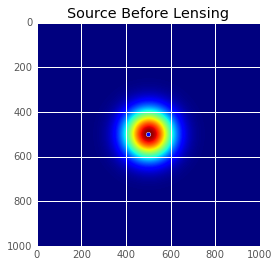

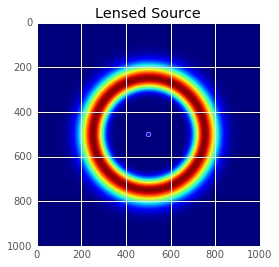

In [293]:
plt.style.use('ggplot')

plt.figure()
plt.title('Source Before Lensing')
plt.scatter(500, 500)
plt.imshow(source1)
plt.show()


plt.figure()
plt.scatter(500, 500)
plt.title('Lensed Source')
plt.imshow(lens1)
plt.show()

**Source toward the edge of Einstein ring**

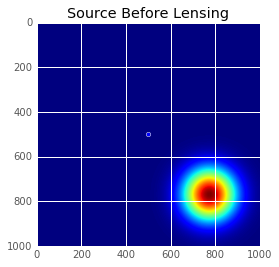

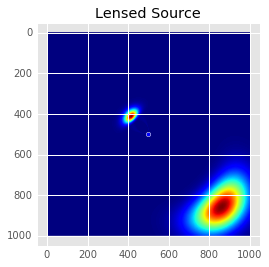

In [292]:
plt.style.use('ggplot')


plt.figure()
plt.title('Source Before Lensing')
plt.scatter(500, 500)
plt.imshow(source2)
plt.show()


plt.figure()
plt.imshow(lens2)
plt.title('Lensed Source')
plt.scatter(500, 500)
plt.show()